## Daniel Arruda Ponte - 121048284

# Imports

In [147]:
using LinearAlgebra
using Plots
using Random
using CSV
using DataFrames
using Clustering

# Operações de Álgebra Linear

In [148]:
function magnitude(x)
    return sqrt(x'x)
end
  
function dist(x, y)
    return sqrt((x - y)' * (x - y))[1]
end

function cos(x, y)
    return (x' * y / (magnitude(x) * magnitude(y)))[1]
end

cos (generic function with 1 method)

# Leitura dos dados

In [149]:
UNVotes = CSV.read("UNVotes.csv", DataFrame)
UNVotes = select(UNVotes, :rcid, :unres, :vote, :ccode, :Country, :Countryname, :importantvote, :me, :nu, :di, :hr, :co, :ec)

Row,rcid,unres,vote,ccode,Country,Countryname,importantvote,me,nu,di,hr,co,ec
,Int64,String15,Int64,String3,String,String,String3,Int64,Int64,Int64,Int64,Int64,Int64
1,3,R/1/66,1,2,USA,United States of America,0,0,0,0,0,0,0
2,3,R/1/66,3,20,CAN,Canada,0,0,0,0,0,0,0
3,3,R/1/66,9,31,BHS,Bahamas,0,0,0,0,0,0,0
4,3,R/1/66,1,40,CUB,Cuba,0,0,0,0,0,0,0
5,3,R/1/66,1,41,HTI,Haiti,0,0,0,0,0,0,0
6,3,R/1/66,1,42,DOM,Dominican Republic,0,0,0,0,0,0,0
7,3,R/1/66,9,51,JAM,Jamaica,0,0,0,0,0,0,0
8,3,R/1/66,9,52,TTO,Trinidad and Tobago,0,0,0,0,0,0,0
9,3,R/1/66,9,53,BRB,Barbados,0,0,0,0,0,0,0


## Seleção dos países

In [150]:
countries = ["BRA", "ARG", "USA", "GBR", "FRA", "CHN", "RUS", "IRN", "IND", "SAU",
    "ZAF", "ETH", "PAK", "JPN", "KOR", "PRK", "IDN", "IRQ", "VNM", "CUB"]

20-element Vector{String}:
 "BRA"
 "ARG"
 "USA"
 "GBR"
 "FRA"
 "CHN"
 "RUS"
 "IRN"
 "IND"
 "SAU"
 "ZAF"
 "ETH"
 "PAK"
 "JPN"
 "KOR"
 "PRK"
 "IDN"
 "IRQ"
 "VNM"
 "CUB"

In [151]:
selected_countries = filter(row -> row.Country in countries, UNVotes)
filter(row -> row.unres == "R/1/66", selected_countries)

Row,rcid,unres,vote,ccode,Country,Countryname,importantvote,me,nu,di,hr,co,ec
,Int64,String15,Int64,String3,String,String,String3,Int64,Int64,Int64,Int64,Int64,Int64
1,3,R/1/66,1,2,USA,United States of America,0,0,0,0,0,0,0
2,3,R/1/66,1,40,CUB,Cuba,0,0,0,0,0,0,0
3,3,R/1/66,1,140,BRA,Brazil,0,0,0,0,0,0,0
4,3,R/1/66,1,160,ARG,Argentina,0,0,0,0,0,0,0
5,3,R/1/66,3,200,GBR,United Kingdom of Great Britain and Northern Ireland,0,0,0,0,0,0,0
6,3,R/1/66,3,220,FRA,France,0,0,0,0,0,0,0
7,3,R/1/66,3,365,RUS,Russian Federation,0,0,0,0,0,0,0
8,3,R/1/66,1,530,ETH,Ethiopia,0,0,0,0,0,0,0
9,3,R/1/66,3,560,ZAF,South Africa,0,0,0,0,0,0,0


## Atribuindo valores aos votos

#### Votos e indicadores númericos

|    **Voto**    | **Antes** | **Depois** |
|:--------------:|:---------:|:----------:|
|       Sim      |     1     |      1     |
|       Não      |     3     |     -1     |
|    Abstenção   |     2     |      0     |
|    Ausência    |     8     |      0     |
| Não era membro |     9     |      0     |

#### Filtra os países e altera os valores númericos dos votos

In [152]:
function set_countries_votes(dataframe, countries)
    dataframe = filter(row -> row.Country in countries, dataframe)
    dataframe.vote .= ifelse.(dataframe.vote .== 8 .|| dataframe.vote .== 9 .|| dataframe.vote .== 2, 0, dataframe.vote)
    dataframe.vote .= ifelse.(dataframe.vote .== 3, -1, dataframe.vote)

    return dataframe
end

set_countries_votes (generic function with 1 method)

In [153]:
selected_countries = set_countries_votes(UNVotes, countries)

filter(row -> row.rcid == 3, selected_countries)

Row,rcid,unres,vote,ccode,Country,Countryname,importantvote,me,nu,di,hr,co,ec
,Int64,String15,Int64,String3,String,String,String3,Int64,Int64,Int64,Int64,Int64,Int64
1,3,R/1/66,1,2,USA,United States of America,0,0,0,0,0,0,0
2,3,R/1/66,1,40,CUB,Cuba,0,0,0,0,0,0,0
3,3,R/1/66,1,140,BRA,Brazil,0,0,0,0,0,0,0
4,3,R/1/66,1,160,ARG,Argentina,0,0,0,0,0,0,0
5,3,R/1/66,-1,200,GBR,United Kingdom of Great Britain and Northern Ireland,0,0,0,0,0,0,0
6,3,R/1/66,-1,220,FRA,France,0,0,0,0,0,0,0
7,3,R/1/66,-1,365,RUS,Russian Federation,0,0,0,0,0,0,0
8,3,R/1/66,1,530,ETH,Ethiopia,0,0,0,0,0,0,0
9,3,R/1/66,-1,560,ZAF,South Africa,0,0,0,0,0,0,0


# Fatoração usando Mínimos Quadrados Alternados

In [154]:
function als(A, r)
    # BC = A
    B = randn(size(A, 1), r)
    C = randn(r, size(A, 2))

    for i = 1:100
        C = B \ A
        B = (C' \ A')'
    end

    return B, C
end

als (generic function with 1 method)

## Cálculo do erro

In [155]:
function factorization_error(A, B, C)
    return norm(A - B * C)
end

factorization_error (generic function with 1 method)

## Lista de erros

In [156]:
function als_error_list(matrix)
    error_list = []
    
    for i = 1:rank(matrix)
        B, C = als(matrix, i)
        push!(error_list, factorization_error(matrix, B, C))
    end
    
    error_list = Vector{Float64}(error_list)

    return error_list
end

als_error_list (generic function with 1 method)

# Fatoração usando SVD

## Redução de dimensionalidade

In [157]:
function svd_dimensionality_reduction(matrix, r)
    U, S, V = svd(matrix)

    # Principal component
    W = U[:, 1:r]
    D = W \ matrix

    return W, D
end

svd_dimensionality_reduction (generic function with 1 method)

## Cálculo do erro

In [158]:
function svd_error_list(matrix)
    error_list = []
    
    for i = 1:rank(matrix)
        U, S, V = svd(matrix)
        W, D = svd_dimensionality_reduction(matrix, i)

        push!(error_list, factorization_error(matrix, W, D))
    end
    
    error_list = Vector{Float64}(error_list)

    return error_list
end

svd_error_list (generic function with 1 method)

# Geração da matriz de votos

In [159]:
function generate_matrix(data, countries)
    resolutions_id = unique(select(data, :rcid))
    matrix = zeros(nrow(resolutions_id), size(countries)[1])

    i = 1

    for country in countries
        resolution = sort(filter(row -> row.Country == country, data), [:rcid])

        resolution_matrix = Matrix(resolution)
        matrix[:, i] = resolution_matrix[:, 3]

        i += 1
    end

    return matrix
end

generate_matrix (generic function with 1 method)

# Exibição dos países em $\R^2$

In [160]:
function plot_countries(D, title, countries)
    pc1 = D[1, :]
    pc2 = D[2, :]

    scatter(pc1, pc2, c=distinguishable_colors(length(countries)), label="", series_annotations=text.(countries, :bottom, 10), size=(1500, 800))
    title!(title)
    xlabel!("Componente principal 1")
    ylabel!("Componente principal 2")
end

plot_countries (generic function with 1 method)

# Casos de análise

## Votações de 1946 até 2022

### Geração da matriz de votos

In [161]:
selected_countries = set_countries_votes(UNVotes, countries)
all_time = generate_matrix(selected_countries, countries)

all_time

6371×20 Matrix{Float64}:
  1.0   1.0   1.0  -1.0  -1.0  0.0  …   0.0   0.0   0.0   0.0  0.0   1.0
 -1.0  -1.0  -1.0  -1.0   0.0  0.0      0.0   0.0   0.0  -1.0  0.0  -1.0
  1.0  -1.0  -1.0  -1.0   1.0  0.0      0.0   0.0   0.0   1.0  0.0   1.0
 -1.0   0.0  -1.0  -1.0  -1.0  0.0      0.0   0.0   0.0   0.0  0.0   1.0
  1.0   1.0  -1.0   1.0  -1.0  0.0      0.0   0.0   0.0   1.0  0.0   1.0
  1.0   1.0  -1.0   1.0   1.0  0.0  …   0.0   0.0   0.0   1.0  0.0   1.0
  0.0   1.0   1.0   1.0   1.0  0.0      0.0   0.0   0.0   1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0  0.0      0.0   0.0   0.0   1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0  0.0      0.0   0.0   0.0   1.0  0.0   1.0
 -1.0   1.0   1.0   0.0  -1.0  0.0      0.0   0.0   0.0  -1.0  0.0   1.0
  ⋮                            ⋮    ⋱         ⋮                     
  1.0   1.0  -1.0   0.0   0.0  1.0      1.0   1.0   1.0   1.0  1.0   1.0
  1.0   1.0   1.0   1.0   1.0  0.0      1.0   0.0   0.0   0.0  0.0   1.0
  1.0   1.0  -1.0  -1.0  -1.0 

In [162]:
rank(all_time)

20

### Mínimos Quadrados Alternados

#### Erros por posto aproximado

In [163]:
error_list = als_error_list(all_time)

20-element Vector{Float64}:
 194.04901107076324
 155.8432924784359
 142.03703092324432
 128.8053605159312
 120.76676646332986
 113.07179549749762
 105.50757754308871
  97.84183731049008
  90.89018304341236
  84.59688034974586
  78.3714791321978
  72.10706730173675
  66.34990248848524
  60.01748232202207
  54.05293047871648
  47.701298417966164
  40.58742991896466
  32.2486254560221
  21.969929426575693
   3.142616243558746e-13

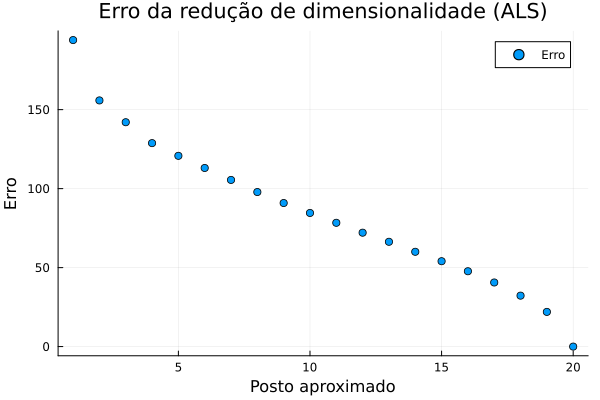

In [164]:
scatter(1:rank(all_time), error_list, seriestype=:scatter, label="Erro")
title!("Erro da redução de dimensionalidade (ALS)")
xlabel!("Posto aproximado")
ylabel!("Erro")

#### Visualização dos países

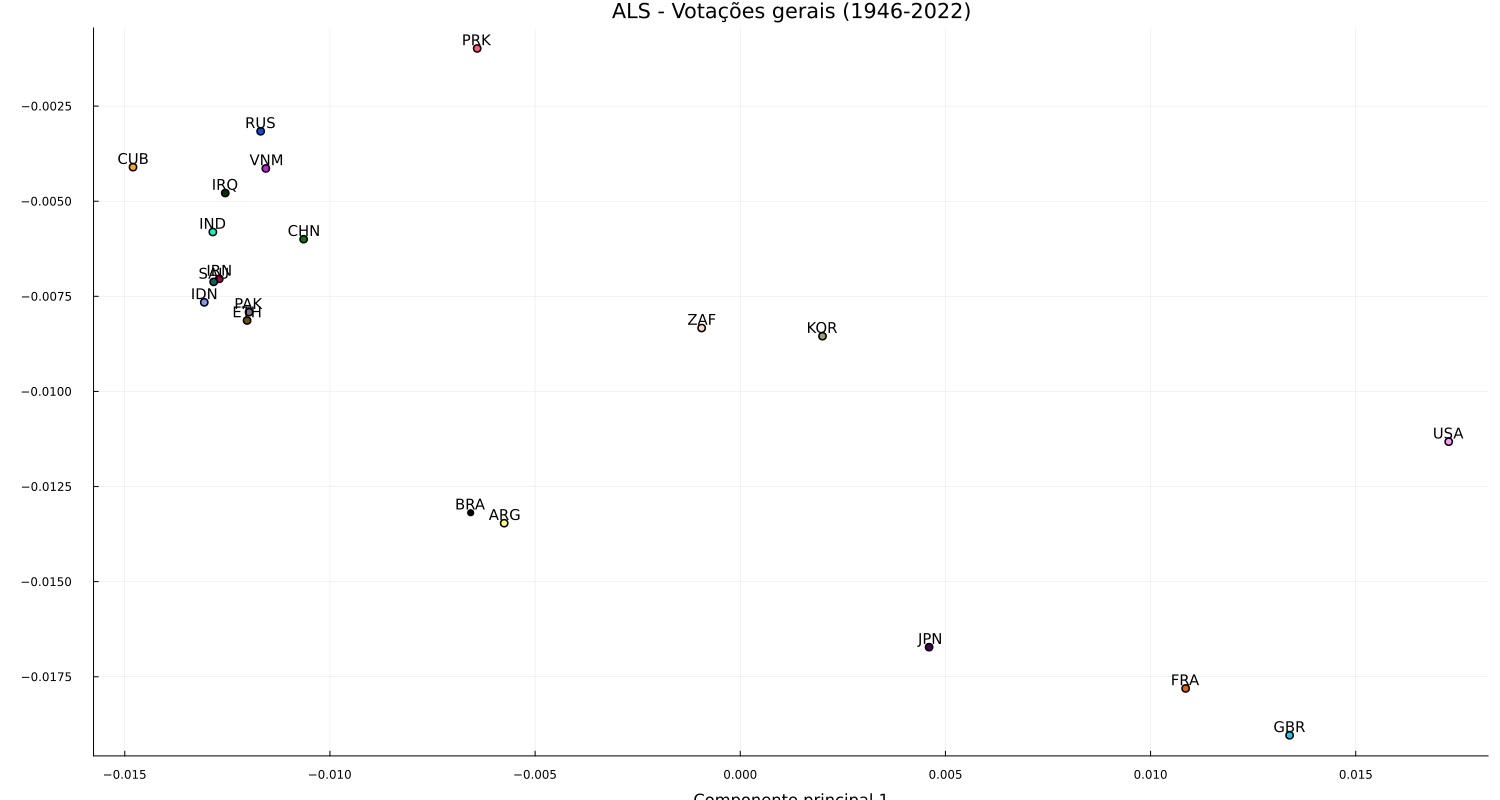

In [165]:
B, C = als(all_time, 2)

plot_countries(C, "ALS - Votações gerais (1946-2022)", countries)

### SVD

#### Erro por posto aproximado

In [166]:
error_list = svd_error_list(all_time)

20-element Vector{Float64}:
 194.04901107076333
 155.84329247843598
 142.03703092324366
 128.80536051593117
 120.76676646302789
 113.07179546262196
 105.50757754281379
  97.84183731048957
  90.89018303108612
  84.59688034962359
  78.37147911506052
  72.10706730173523
  66.24248902245324
  60.01748232202209
  54.0529288538017
  47.699341142251235
  40.58581666768867
  32.24862545162213
  21.969929426575614
   1.7301686478128978e-12

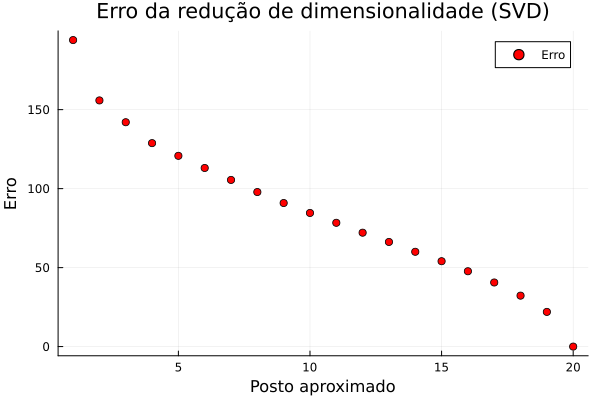

In [167]:
scatter(1:rank(all_time), error_list, seriestype=:scatter, label="Erro", color=:red)
title!("Erro da redução de dimensionalidade (SVD)")
xlabel!("Posto aproximado")
ylabel!("Erro")

#### Visualização dos países 

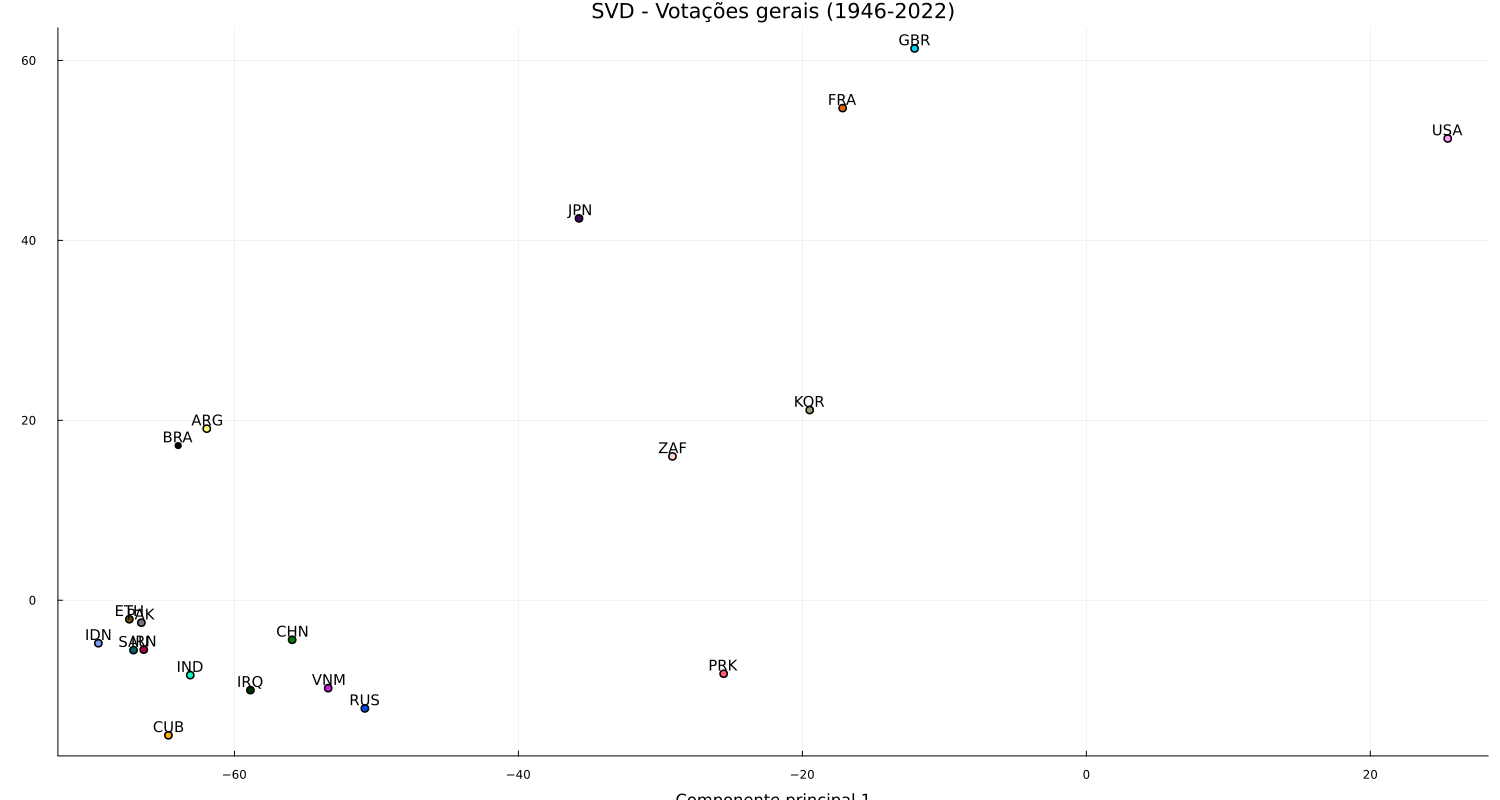

In [168]:
W, D = svd_dimensionality_reduction(all_time, 2)
plot_countries(D, "SVD - Votações gerais (1946-2022)", countries)

### Diferenças entre as bases de ALS e SVD

In [169]:
print(cos(B[:, 1], W[:, 1]))
print("\n")
print(dist(B[:, 1], W[:, 1]))

0.9101765188632028
3853.4087469895667

In [170]:
print(cos(B[:, 1], W[:, 2]))
print("\n")
print(dist(B[:, 1], W[:, 2]))

0.41422059884807677
3853.9047881245197

In [171]:
print(cos(B[:, 2], W[:, 1]))
print("\n")
print(dist(B[:, 2], W[:, 1]))

0.8282596395270072
3744.809976955412

In [172]:
print(cos(B[:, 2], W[:, 2]))
print("\n")
print(dist(B[:, 2], W[:, 2]))

-0.5603445096818478
3746.198630743155

### Clusterização

#### 2 grupos

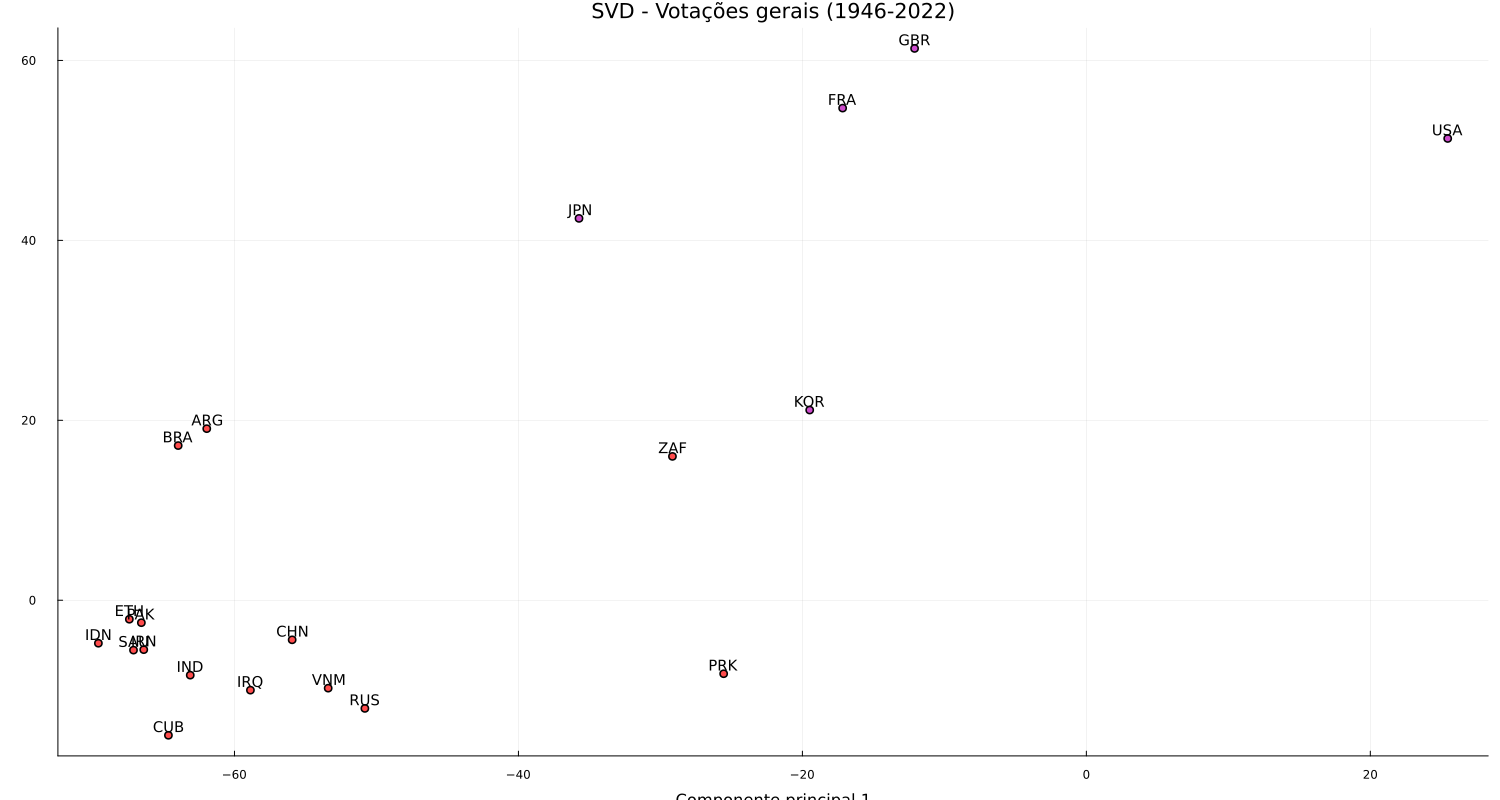

In [173]:
W, D = svd_dimensionality_reduction(all_time, 2)
result = kmeans(D, 2)

pc1 = D[1, :]
pc2 = D[2, :]

scatter(pc1, pc2, marker_z=result.assignments, color=:lightrainbow, legend=false, label="", series_annotations=text.(countries, :bottom, 10), size=(1500, 800))
title!("SVD - Votações gerais (1946-2022)")
xlabel!("Componente principal 1")
ylabel!("Componente principal 2")

#### 3 grupos

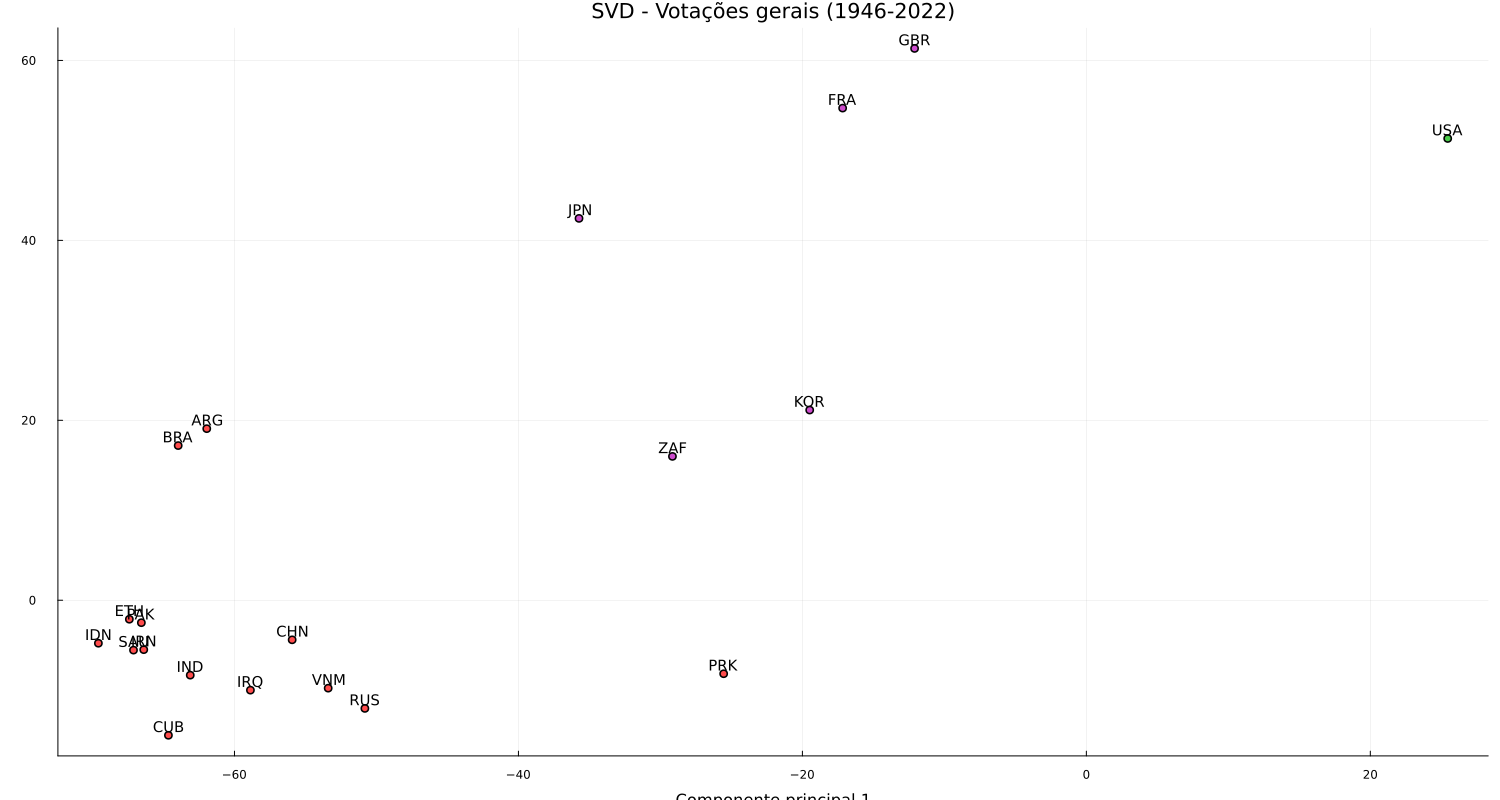

In [174]:
W, D = svd_dimensionality_reduction(all_time, 2)
result = kmeans(D, 3)

pc1 = D[1, :]
pc2 = D[2, :]

scatter(pc1, pc2, marker_z=result.assignments, color=:lightrainbow, legend=false, label="", series_annotations=text.(countries, :bottom, 10), size=(1500, 800))
title!("SVD - Votações gerais (1946-2022)")
xlabel!("Componente principal 1")
ylabel!("Componente principal 2")

## Período da Guerra Fria (1946-1991)

In [175]:
cw = set_countries_votes(UNVotes, countries)
cw = filter(row -> (row.rcid <= 3661), cw)

cw_matrix = generate_matrix(cw, countries)

3656×20 Matrix{Float64}:
  1.0   1.0   1.0  -1.0  -1.0  0.0  -1.0  …  0.0   0.0  0.0   0.0  0.0   1.0
 -1.0  -1.0  -1.0  -1.0   0.0  0.0   1.0     0.0   0.0  0.0  -1.0  0.0  -1.0
  1.0  -1.0  -1.0  -1.0   1.0  0.0   1.0     0.0   0.0  0.0   1.0  0.0   1.0
 -1.0   0.0  -1.0  -1.0  -1.0  0.0  -1.0     0.0   0.0  0.0   0.0  0.0   1.0
  1.0   1.0  -1.0   1.0  -1.0  0.0  -1.0     0.0   0.0  0.0   1.0  0.0   1.0
  1.0   1.0  -1.0   1.0   1.0  0.0   1.0  …  0.0   0.0  0.0   1.0  0.0   1.0
  0.0   1.0   1.0   1.0   1.0  0.0   1.0     0.0   0.0  0.0   1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0  0.0   1.0     0.0   0.0  0.0   1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0  0.0   1.0     0.0   0.0  0.0   1.0  0.0   1.0
 -1.0   1.0   1.0   0.0  -1.0  0.0  -1.0     0.0   0.0  0.0  -1.0  0.0   1.0
  ⋮                            ⋮          ⋱        ⋮                    
  1.0   1.0   1.0   1.0   1.0  0.0   1.0     1.0   0.0  0.0  -1.0  0.0   0.0
  1.0   1.0   1.0   1.0   1.0  1.0   1.0     1.0   1.0 

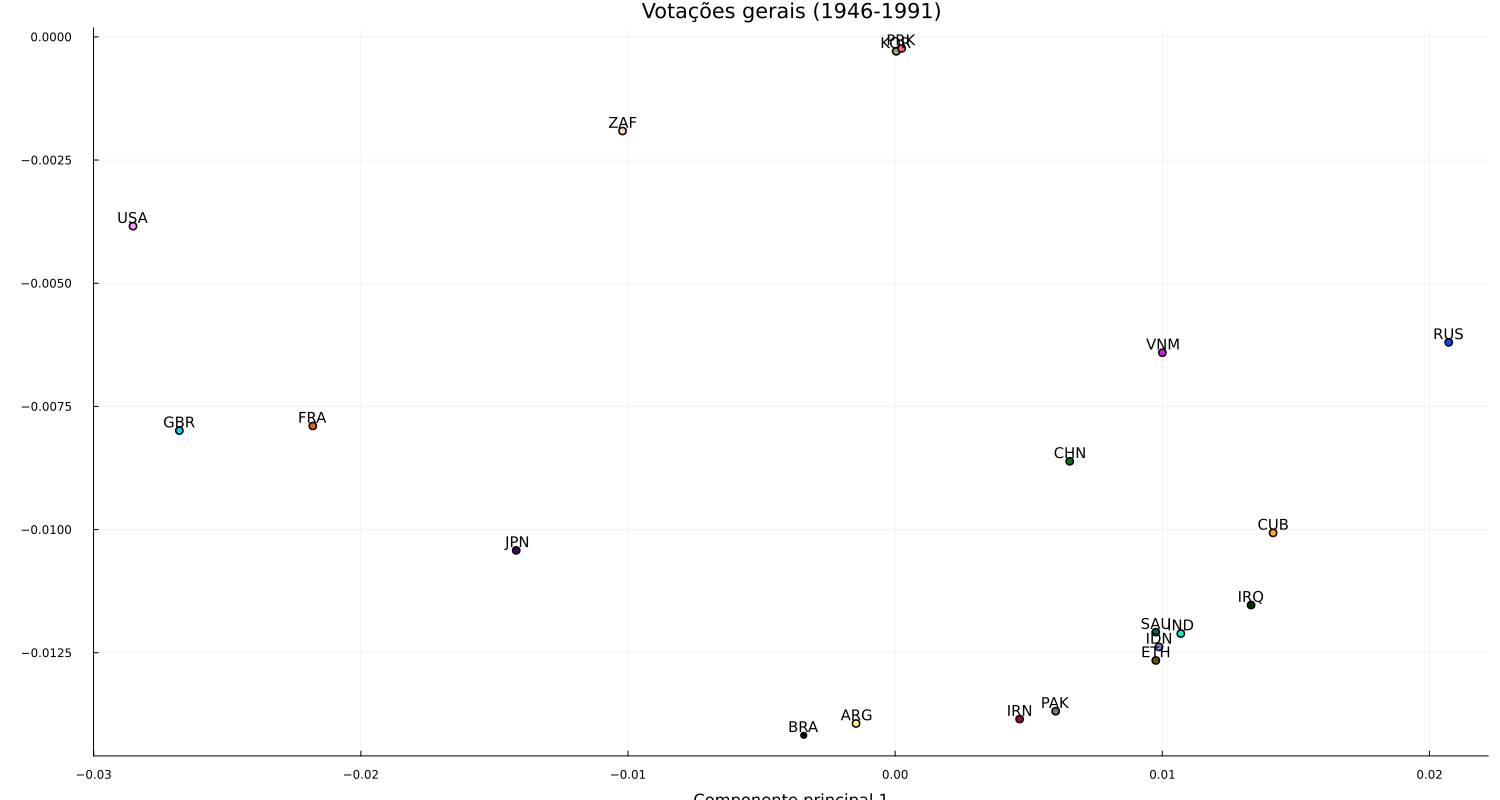

In [176]:
B, C = als(cw_matrix, 2)

plot_countries(C, "Votações gerais (1946-1991)", countries)

## Pós Guerra Fria (1992-2022)

In [177]:
pcw = set_countries_votes(UNVotes, countries)
pcw = filter(row -> (row.rcid > 3661), pcw)

pcw_matrix = generate_matrix(pcw, countries)

2715×20 Matrix{Float64}:
 1.0  1.0   1.0   1.0   1.0  1.0   0.0  …   1.0   0.0   1.0   1.0  1.0   1.0
 0.0  1.0   1.0   1.0   1.0  0.0   1.0      1.0   0.0   1.0   0.0  0.0   0.0
 1.0  1.0   1.0   1.0   1.0  1.0   1.0      1.0   1.0   1.0   0.0  1.0   0.0
 1.0  1.0   0.0   0.0  -1.0  1.0   1.0      0.0   1.0   1.0   1.0  1.0   1.0
 1.0  1.0  -1.0   1.0   1.0  1.0   1.0      1.0   0.0   1.0   1.0  1.0   1.0
 1.0  1.0   0.0   0.0   0.0  1.0   1.0  …   1.0   1.0   1.0   1.0  1.0   1.0
 1.0  0.0  -1.0  -1.0  -1.0  1.0  -1.0      0.0   1.0   1.0   1.0  1.0   1.0
 1.0  0.0  -1.0  -1.0  -1.0  1.0  -1.0      0.0   1.0   1.0   1.0  1.0   1.0
 1.0  0.0  -1.0   0.0   1.0  1.0   0.0      0.0   1.0   1.0   1.0  1.0   1.0
 1.0  1.0  -1.0  -1.0   0.0  1.0   0.0      1.0   1.0   1.0   1.0  1.0   1.0
 ⋮                           ⋮          ⋱         ⋮                     
 1.0  1.0  -1.0   0.0   0.0  1.0   1.0      1.0   1.0   1.0   1.0  1.0   1.0
 1.0  1.0   1.0   1.0   1.0  0.0   0.0      1.0   0.0  

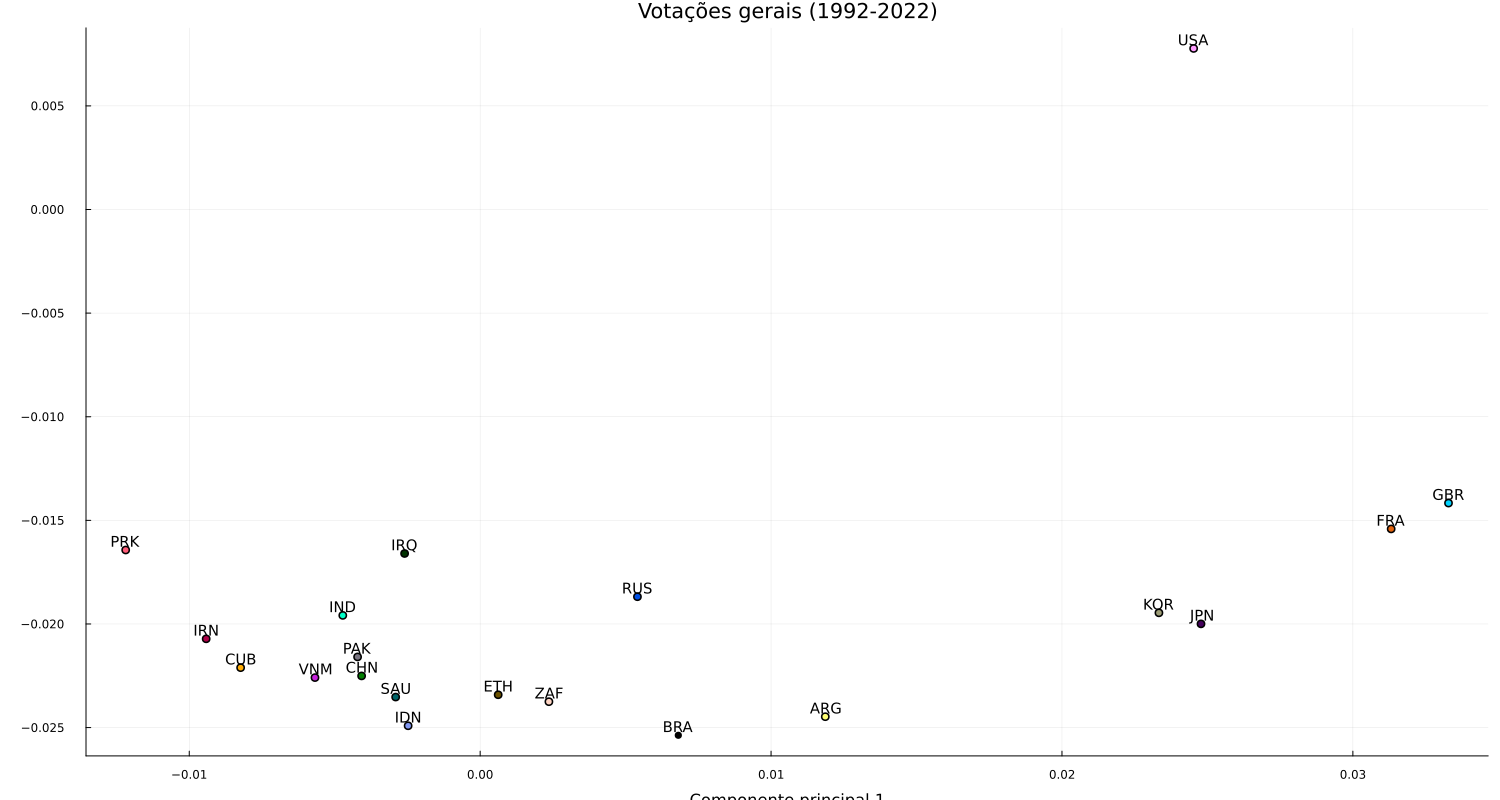

In [178]:
B, C = als(pcw_matrix, 2)

plot_countries(C, "Votações gerais (1992-2022)", countries)

## Questão palestina

In [179]:
palestine = set_countries_votes(UNVotes, countries)
palestine = filter(row -> (row.me == 1), palestine)

palestine_matrix = generate_matrix(palestine, countries)

1087×20 Matrix{Float64}:
  1.0   0.0   1.0   0.0   1.0  0.0  …  0.0  0.0  0.0  0.0  -1.0  0.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  0.0     0.0  0.0  0.0  0.0  -1.0  0.0  -1.0
  1.0   1.0   1.0   1.0   1.0  0.0     0.0  0.0  0.0  0.0   1.0  0.0   1.0
  1.0   0.0  -1.0  -1.0   0.0  0.0     0.0  0.0  0.0  0.0  -1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0  0.0     0.0  0.0  0.0  0.0  -1.0  0.0  -1.0
  1.0   1.0   1.0   1.0   1.0  0.0  …  0.0  0.0  0.0  0.0  -1.0  0.0   1.0
  1.0   1.0  -1.0   1.0  -1.0  0.0     0.0  0.0  0.0  0.0   1.0  0.0   1.0
  0.0   1.0   1.0   0.0   1.0  0.0     0.0  0.0  0.0  0.0  -1.0  0.0   1.0
 -1.0  -1.0   1.0   0.0   1.0  0.0     0.0  0.0  0.0  0.0  -1.0  0.0  -1.0
 -1.0  -1.0   1.0   1.0  -1.0  0.0     0.0  0.0  0.0  0.0  -1.0  0.0  -1.0
  ⋮                            ⋮    ⋱            ⋮                    
  1.0   1.0  -1.0   1.0   1.0  1.0     1.0  1.0  1.0  1.0   0.0  1.0   1.0
  0.0   1.0  -1.0   1.0   1.0  1.0     1.0  1.0  1.0  1.0   1.0  1.0   1.0
  1.

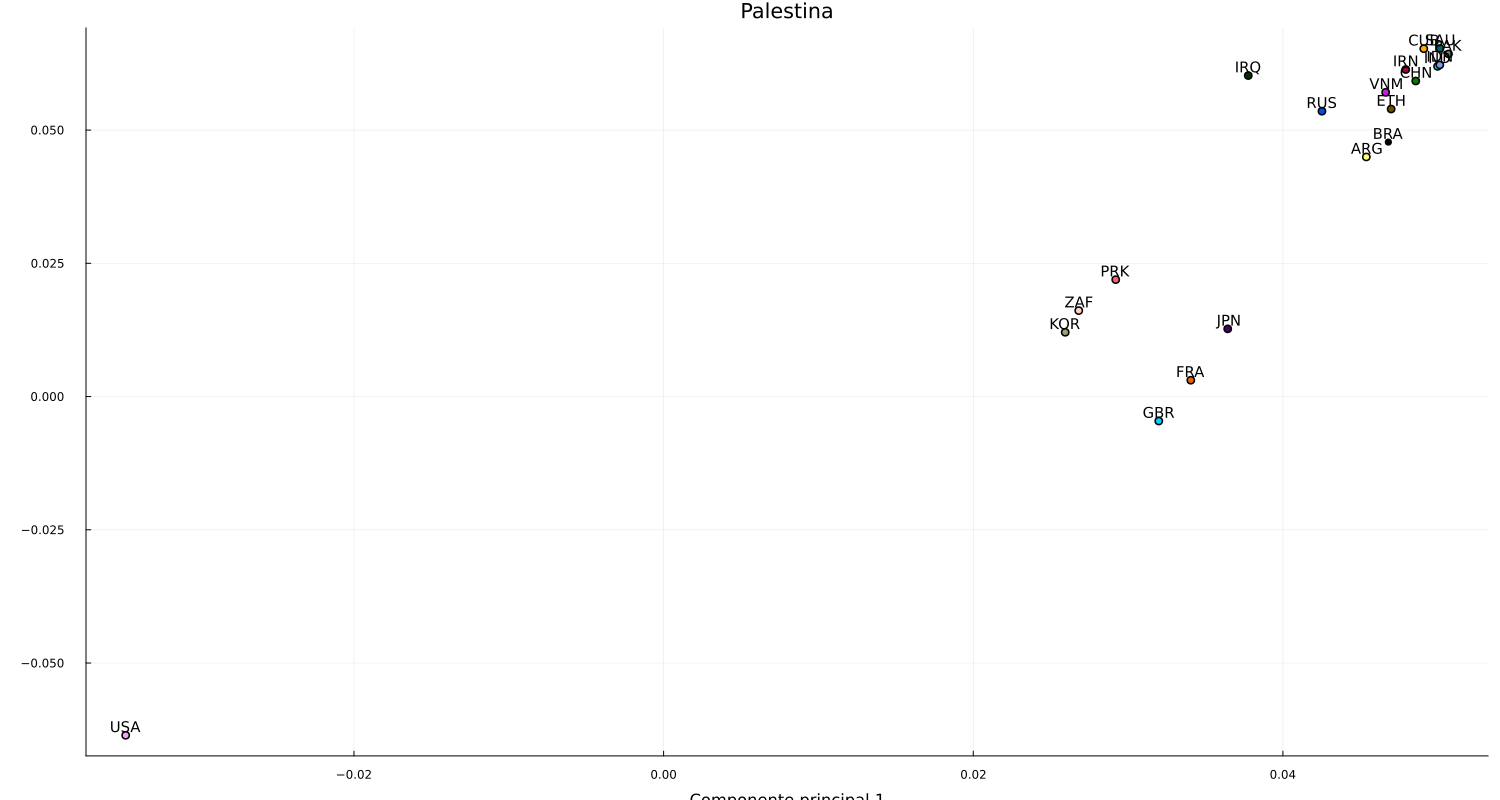

In [180]:
B, C = als(palestine_matrix, 2)

plot_countries(C, "Palestina", countries)

## Armas nucleares

In [181]:
nuclear = set_countries_votes(UNVotes, countries)
nuclear = filter(row -> (row.nu == 1), nuclear)

nuclear_matrix = generate_matrix(nuclear, countries)

886×20 Matrix{Float64}:
 -1.0   0.0  -1.0  -1.0  -1.0   0.0  …   0.0   0.0  0.0   0.0  0.0  -1.0
 -1.0   0.0  -1.0  -1.0  -1.0   0.0      0.0   0.0  0.0   0.0  0.0  -1.0
 -1.0   0.0  -1.0  -1.0  -1.0   0.0      0.0   0.0  0.0   0.0  0.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0   0.0      0.0   0.0  0.0  -1.0  0.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0   0.0      0.0   0.0  0.0  -1.0  0.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0   0.0  …   0.0   0.0  0.0   0.0  0.0  -1.0
  1.0   1.0   1.0   1.0   1.0   0.0      0.0   0.0  0.0   1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0   0.0      0.0   0.0  1.0   1.0  0.0   1.0
 -1.0  -1.0  -1.0  -1.0  -1.0   0.0      0.0   0.0  1.0   0.0  0.0  -1.0
  1.0   1.0   1.0   1.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0   1.0
  ⋮                             ⋮    ⋱         ⋮                    
  0.0   1.0   1.0   1.0   1.0  -1.0      1.0  -1.0  0.0   0.0  1.0   0.0
  0.0   1.0  -1.0  -1.0  -1.0   1.0     -1.0   0.0  1.0   1.0  1.0   1.0
  1.0   0.0  -1.0  -1.0  -1.0  

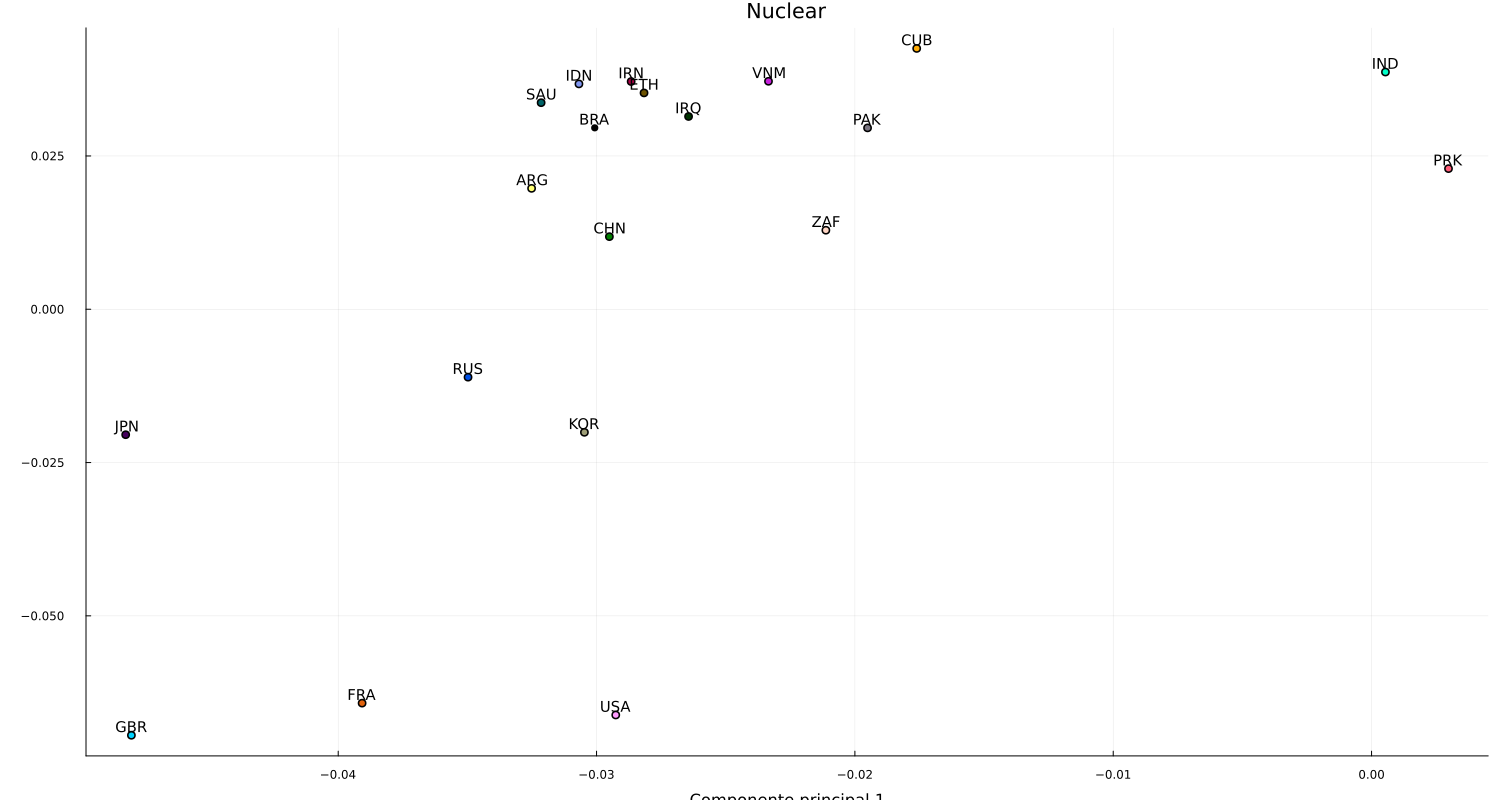

In [182]:
B, C = als(nuclear_matrix, 2)

plot_countries(C, "Nuclear", countries)

## Controle de armas e desarmamento

In [183]:
gun = set_countries_votes(UNVotes, countries)
gun = filter(row -> (row.di == 1), gun)

gun_matrix = generate_matrix(gun, countries)

1127×20 Matrix{Float64}:
 -1.0  -1.0  -1.0  -1.0  -1.0   0.0   1.0  …   0.0  0.0  0.0   0.0  0.0  -1.0
 -1.0   0.0  -1.0  -1.0  -1.0   0.0   1.0      0.0  0.0  0.0   0.0  0.0  -1.0
 -1.0   0.0  -1.0  -1.0  -1.0   0.0   1.0      0.0  0.0  0.0   0.0  0.0  -1.0
 -1.0   0.0  -1.0  -1.0   0.0   0.0   1.0      0.0  0.0  0.0   0.0  0.0   0.0
 -1.0   0.0  -1.0  -1.0   0.0   0.0   1.0      0.0  0.0  0.0   0.0  0.0   0.0
 -1.0   0.0  -1.0  -1.0   0.0   0.0   1.0  …   0.0  0.0  0.0   0.0  0.0  -1.0
 -1.0   0.0  -1.0  -1.0  -1.0   0.0   1.0      0.0  0.0  0.0   0.0  0.0  -1.0
 -1.0   0.0  -1.0  -1.0  -1.0   0.0   1.0      0.0  0.0  0.0   0.0  0.0  -1.0
 -1.0   0.0  -1.0  -1.0  -1.0   0.0   1.0      0.0  0.0  0.0   0.0  0.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0   0.0   1.0      0.0  0.0  0.0  -1.0  0.0  -1.0
  ⋮                             ⋮          ⋱        ⋮                    
  1.0   1.0   1.0   1.0   1.0  -1.0  -1.0      1.0  0.0  1.0   1.0  1.0   0.0
  1.0   1.0   1.0   1.0   1.0   1.0   0.0  

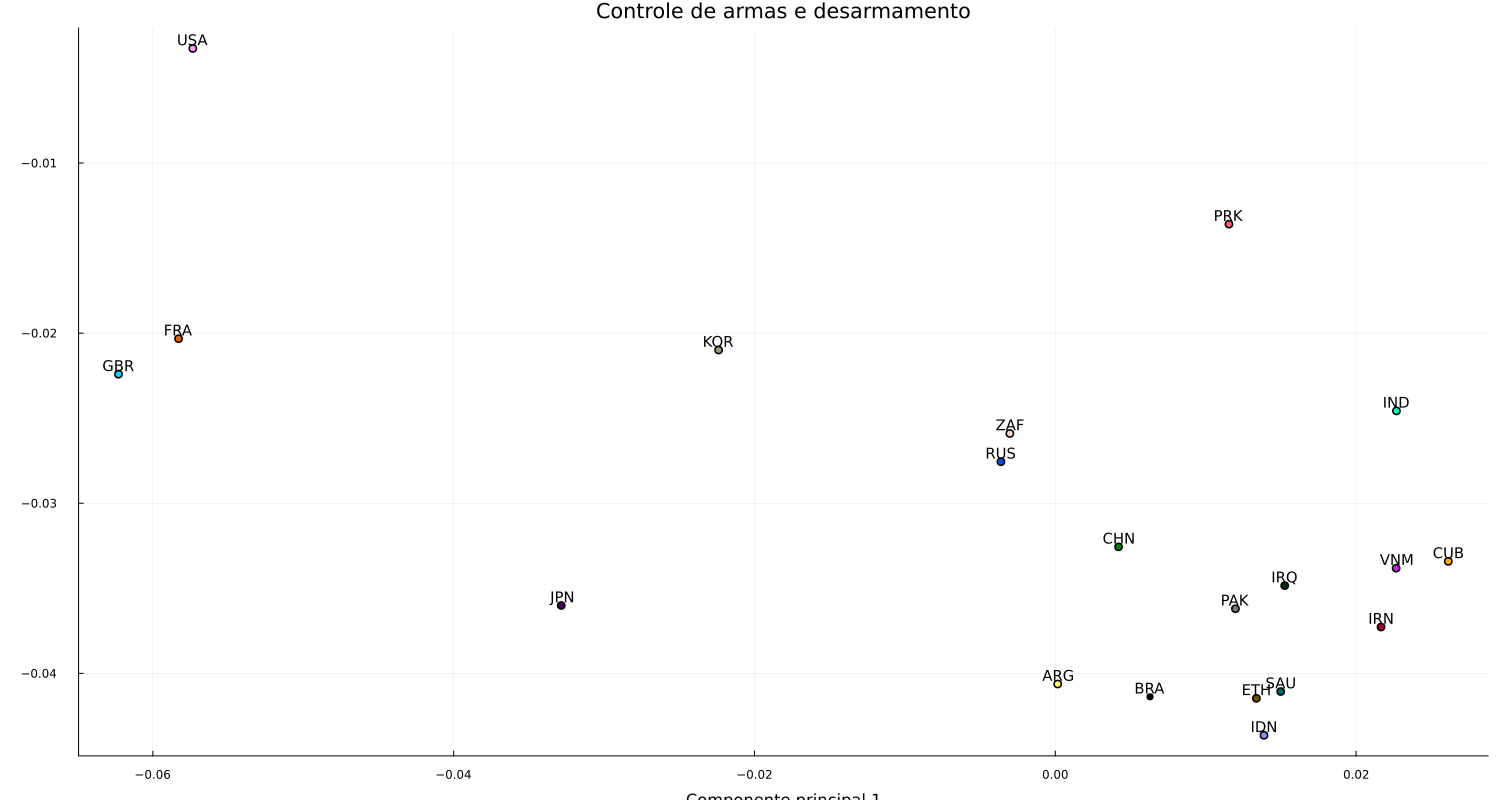

In [184]:
B, C = als(gun_matrix, 2)

plot_countries(C, "Controle de armas e desarmamento", countries)

## Colonialismo

In [185]:
colonialism = set_countries_votes(UNVotes, countries)
colonialism = filter(row -> (row.co == 1), colonialism)

colonialism_matrix = generate_matrix(colonialism, countries)

992×20 Matrix{Float64}:
  1.0   1.0   1.0   1.0   1.0   0.0   1.0  …   0.0  0.0  0.0  1.0  0.0   1.0
 -1.0  -1.0  -1.0  -1.0  -1.0   0.0   1.0      0.0  0.0  0.0  0.0  0.0  -1.0
  1.0   1.0   1.0   1.0   1.0   0.0  -1.0      0.0  0.0  0.0  1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0   0.0  -1.0      0.0  0.0  0.0  1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0   0.0  -1.0      0.0  0.0  0.0  1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0   0.0  -1.0  …   0.0  0.0  0.0  1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0   0.0  -1.0      0.0  0.0  0.0  1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0   0.0  -1.0      0.0  0.0  0.0  1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0   0.0  -1.0      0.0  0.0  0.0  1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0   0.0  -1.0      0.0  0.0  0.0  1.0  0.0   1.0
  ⋮                             ⋮          ⋱        ⋮                   
  1.0   1.0   1.0   1.0   1.0  -1.0  -1.0      1.0  0.0  1.0  1.0  1.0   0.0
  1.0   1.0   1.0   1.0   1.0   1.0   0.0      1.0  1.0 

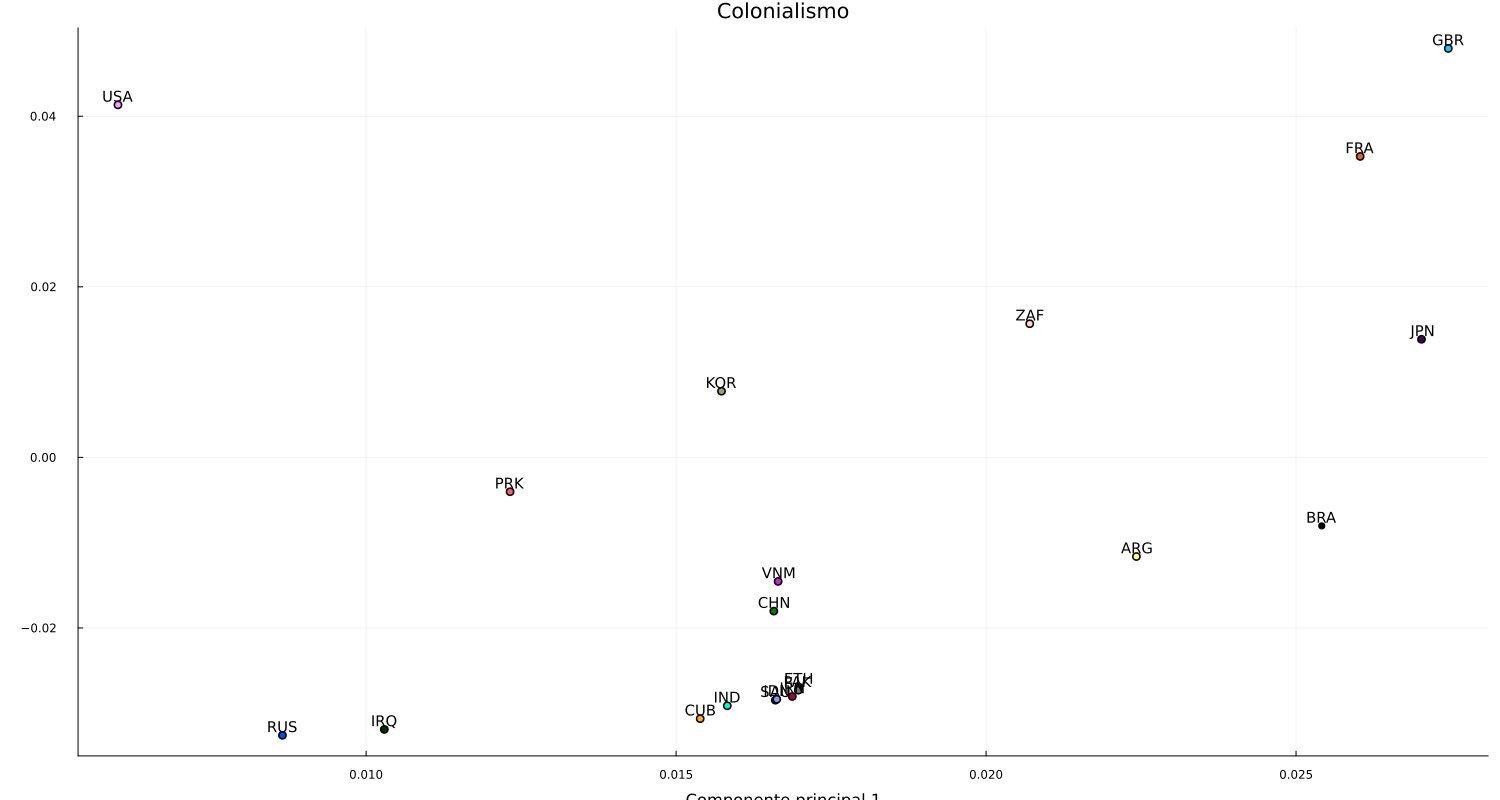

In [186]:
B, C = als(colonialism_matrix, 2)

plot_countries(C, "Colonialismo", countries)

## Direitos humanos

In [187]:
human_rights = set_countries_votes(UNVotes, countries)
human_rights = filter(row -> ((row.Country in countries) && row.hr == 1), human_rights)

human_rights_matrix = generate_matrix(human_rights, countries)

1037×20 Matrix{Float64}:
 -1.0   0.0  -1.0  -1.0  -1.0   0.0  …   0.0   0.0  0.0   0.0  0.0   1.0
 -1.0   1.0  -1.0  -1.0   1.0   0.0      0.0   0.0  0.0  -1.0  0.0  -1.0
 -1.0  -1.0  -1.0  -1.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  -1.0
 -1.0   0.0  -1.0  -1.0  -1.0   0.0      0.0   0.0  0.0   0.0  0.0   0.0
 -1.0   0.0  -1.0  -1.0  -1.0   0.0      0.0   0.0  0.0  -1.0  0.0  -1.0
 -1.0   0.0  -1.0  -1.0  -1.0   0.0  …   0.0   0.0  0.0  -1.0  0.0   0.0
 -1.0   0.0  -1.0  -1.0   0.0   0.0      0.0   0.0  0.0  -1.0  0.0   0.0
  1.0   1.0   1.0   1.0   1.0   0.0      0.0   0.0  0.0   1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0   0.0      0.0   0.0  0.0   0.0  0.0   1.0
  1.0   0.0   1.0   1.0   1.0   0.0      0.0   0.0  0.0   0.0  0.0   1.0
  ⋮                             ⋮    ⋱         ⋮                    
  1.0   1.0   0.0   0.0   0.0   1.0      0.0   0.0  1.0   1.0  1.0   1.0
  0.0   1.0  -1.0  -1.0   0.0   1.0      0.0   1.0  1.0   1.0  1.0   1.0
  1.0   1.0  -1.0  -1.0  -1.0 

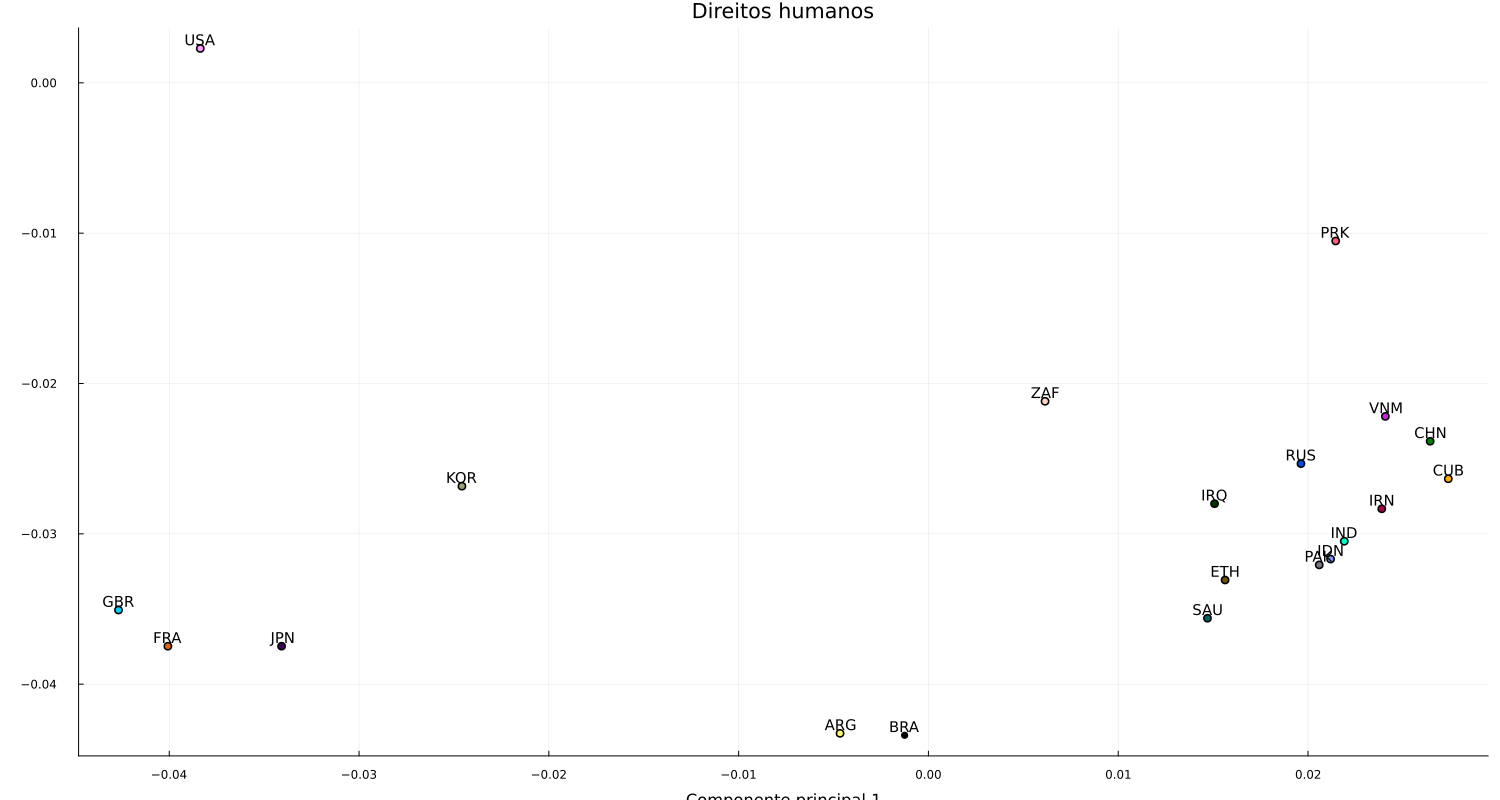

In [188]:
B, C = als(human_rights_matrix, 2)

plot_countries(C, "Direitos humanos", countries)

## Economia

In [189]:
economy = set_countries_votes(UNVotes, countries)
economy = filter(row -> (row.ec == 1), economy)

economy_matrix = generate_matrix(economy, countries)

800×20 Matrix{Float64}:
  1.0   1.0  -1.0   1.0   1.0   0.0   1.0  …   0.0  0.0  0.0   1.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0   0.0   1.0      0.0  0.0  0.0   1.0  0.0   1.0
 -1.0  -1.0  -1.0  -1.0   1.0   0.0   1.0      0.0  0.0  0.0   1.0  0.0  -1.0
  1.0   1.0   1.0   1.0   0.0   0.0  -1.0      0.0  0.0  0.0   0.0  0.0   1.0
  1.0   1.0   1.0   1.0   1.0   0.0  -1.0      0.0  0.0  0.0   1.0  0.0   1.0
  1.0   1.0  -1.0   1.0  -1.0   0.0  -1.0  …   0.0  0.0  0.0  -1.0  0.0   1.0
 -1.0   1.0  -1.0  -1.0   1.0   0.0   1.0      0.0  0.0  0.0  -1.0  0.0  -1.0
 -1.0   1.0  -1.0  -1.0   1.0   0.0   1.0      0.0  0.0  0.0  -1.0  0.0  -1.0
  1.0   1.0   1.0   1.0  -1.0   0.0   0.0      0.0  0.0  0.0  -1.0  0.0   1.0
  0.0   0.0   1.0   1.0   1.0   0.0  -1.0      0.0  0.0  0.0   0.0  0.0   1.0
  ⋮                             ⋮          ⋱        ⋮                    
  1.0   1.0   1.0   1.0   1.0  -1.0  -1.0      1.0  0.0  1.0   1.0  1.0   0.0
  1.0   1.0   1.0   1.0   1.0   1.0   0.0   

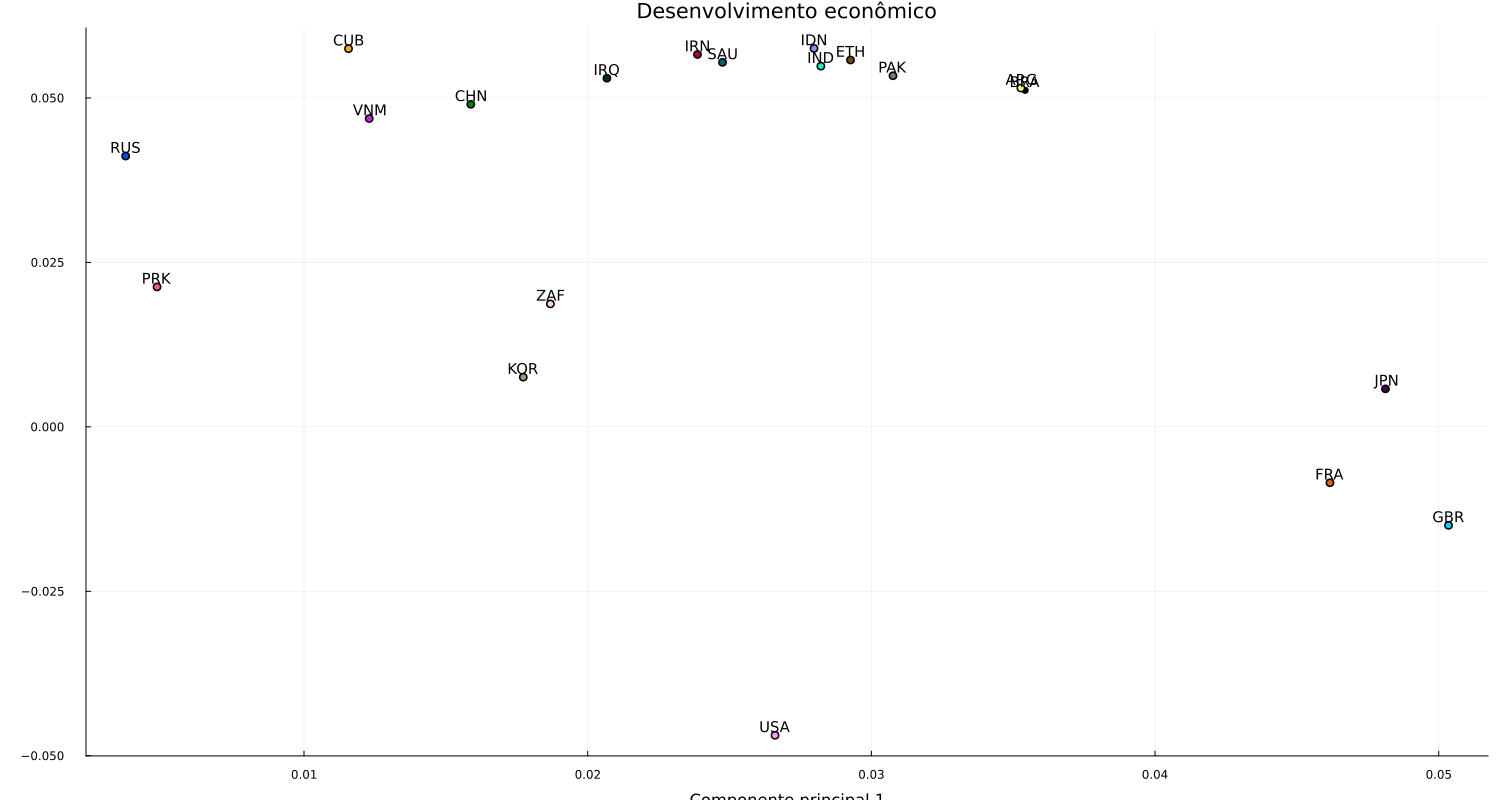

In [190]:
B, C = als(economy_matrix, 2)

plot_countries(C, "Desenvolvimento econômico", countries)